In [1]:
# Pandas and Numpy to process and read the tabular data
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in the original dataset
df = pd.read_csv("Datasets/Dataset_Coeff_Estimation.csv")

# Inspecting the general structure of the dataset
df.head()

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth,Semeron
0,35-44,0,Professional certificate/ diploma,39.0,36.0,42.0,37.0,42.0,-0.21712,-1.18084,6,0,0,0
1,25-34,1,Doctorate degree,29.0,52.0,55.0,48.0,41.0,-0.71126,-0.21575,6,4,3,0
2,35-44,1,Professional certificate/ diploma,31.0,45.0,40.0,32.0,34.0,-1.37983,0.40148,6,3,0,0
3,18-24,0,Masters degree,34.0,34.0,46.0,47.0,46.0,-1.37983,-1.18084,5,2,0,0
4,35-44,0,Doctorate degree,43.0,28.0,43.0,41.0,50.0,-0.21712,-0.21575,6,3,0,0


In [3]:
# Check for null values
print(df.isnull().sum())

print(df.dtypes)

Age                  0
Gender               0
Education            0
Nscore               0
Escore               0
Oscore               0
Ascore               0
Cscore               0
Impulsive            0
Sensation_seeking    0
Caffeine             0
Cannabis             0
Meth                 0
Semeron              0
dtype: int64
Age                   object
Gender                 int64
Education             object
Nscore               float64
Escore               float64
Oscore               float64
Ascore               float64
Cscore               float64
Impulsive            float64
Sensation_seeking    float64
Caffeine               int64
Cannabis               int64
Meth                   int64
Semeron                int64
dtype: object


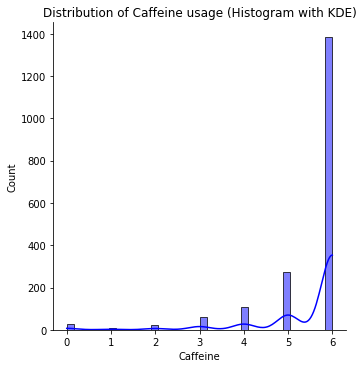

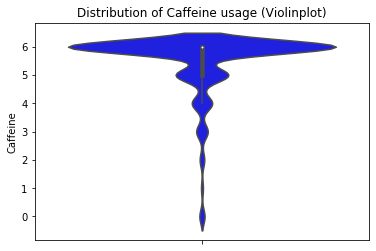

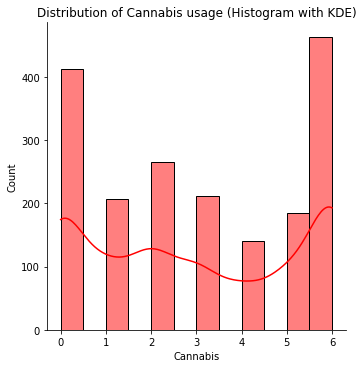

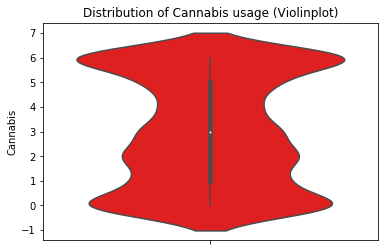

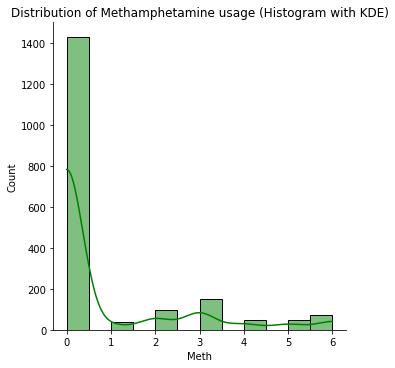

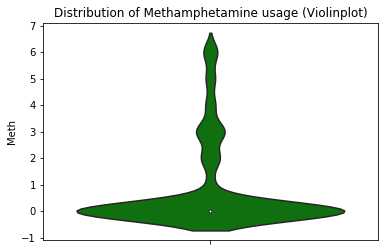

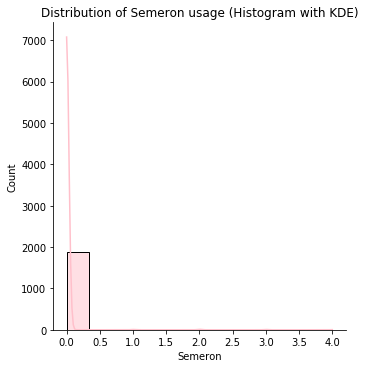

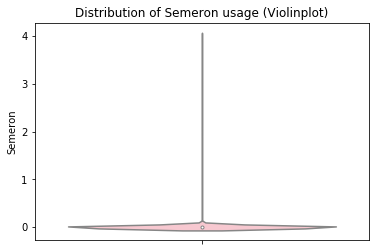

In [4]:
# Distributions of Drugs in our network

drug_list = [["Caffeine","blue","Caffeine"],["Cannabis","red","Cannabis"],["Meth","green","Methamphetamine"],["Semeron","Pink","Semeron"]]

for drug, color, name in drug_list:
        
    sns.displot(df[drug],color=color,kde=True)
    plt.title("Distribution of " + str(name) + " usage (Histogram with KDE)")
    plt.show()

    sns.violinplot(y=df[drug],color=color)
    plt.title("Distribution of " + str(name) + " usage (Violinplot)")
    plt.show()

# We can see that it is not the case that the drugs are "Normally" distributed
    
# Here we encounter a big problem, Semeron is extremely under represented/unbalanced

# Because of this we will decide to exclude Semeron out of the project

df = df.drop("Semeron",1)

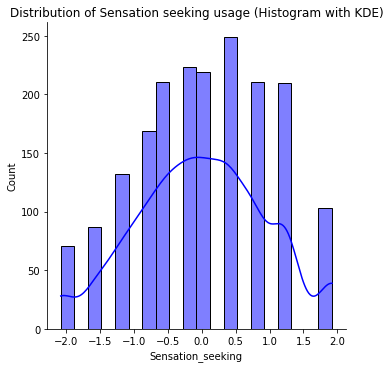

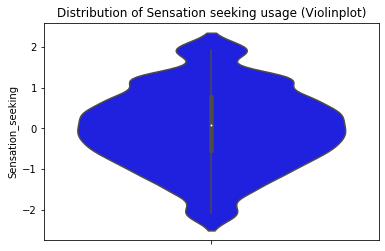

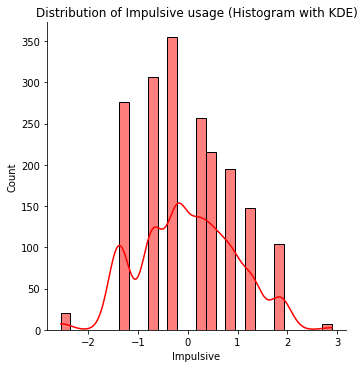

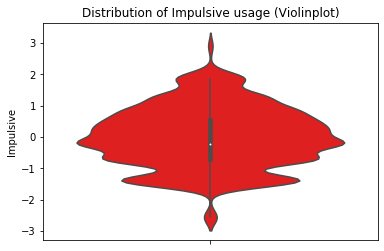

In [5]:
# Distributions of non "Big Five" personality traits in our network

pertrait_list = [["Sensation_seeking","blue","Sensation seeking"],["Impulsive","red","Impulsive"]]
             
for var, color, name in pertrait_list:
        
    sns.displot(df[var],color=color,kde=True)
    plt.title("Distribution of " + str(name) + " usage (Histogram with KDE)")
    plt.show()

    sns.violinplot(y=df[var],color=color)
    plt.title("Distribution of " + str(name) + " usage (Violinplot)")
    plt.show()
    
# We can see that these variables are roughly "Normally" distributed

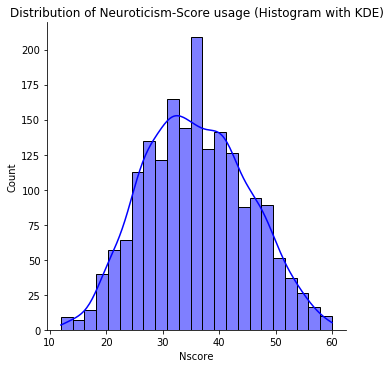

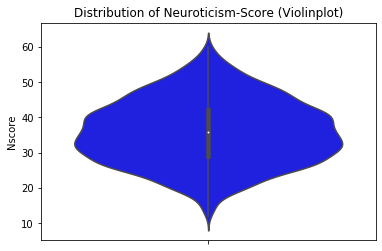

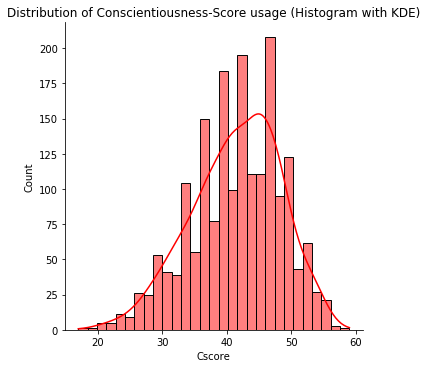

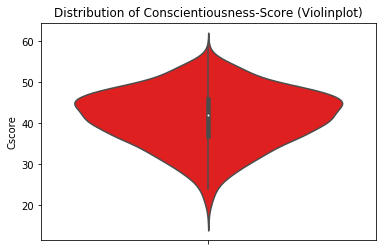

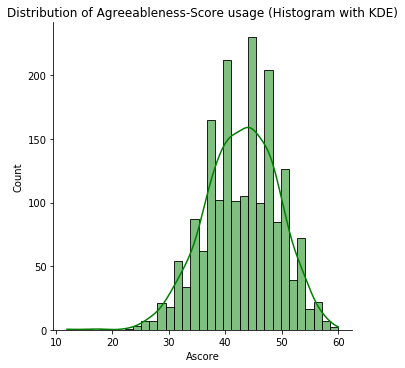

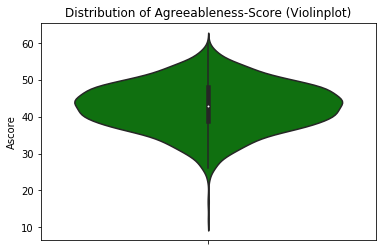

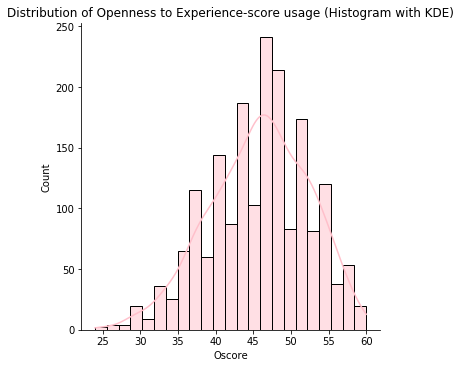

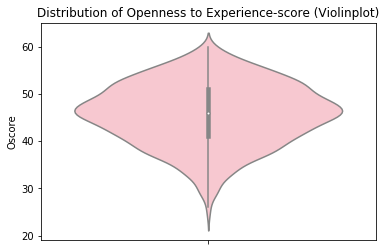

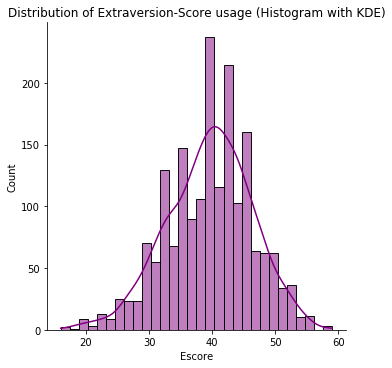

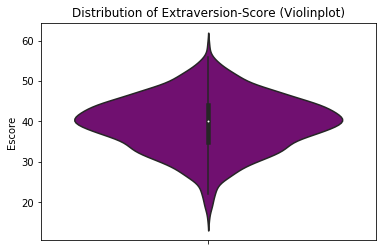

In [6]:
# Distributions of "Big Five" personality scores

# Distributions of Drugs in our network

big5_list = [["Nscore","blue","Neuroticism-Score"],["Cscore","red","Conscientiousness-Score"],["Ascore","green","Agreeableness-Score"],["Oscore","Pink","Openness to Experience-score"],["Escore","purple","Extraversion-Score"]]

for score, color, name in big5_list:
    
    sns.displot(df[score],color=color,kde=True)
    plt.title("Distribution of " + str(name) + " usage (Histogram with KDE)")
    plt.show()

    sns.violinplot(y=df[score],color=color)
    plt.title("Distribution of " + str(name) + " (Violinplot)")
    plt.show()

# We can see that these variables are roughly "Normally" distributed

Integer column relationships in dataset


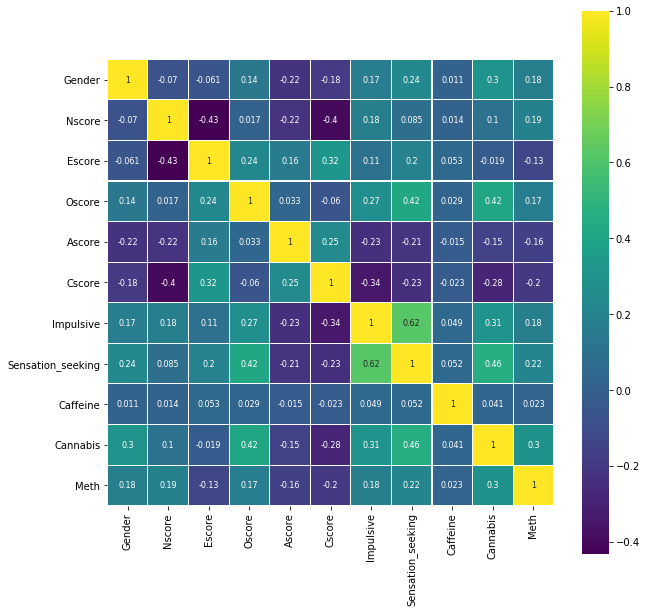

(Strongest) Integer column relationships in dataset


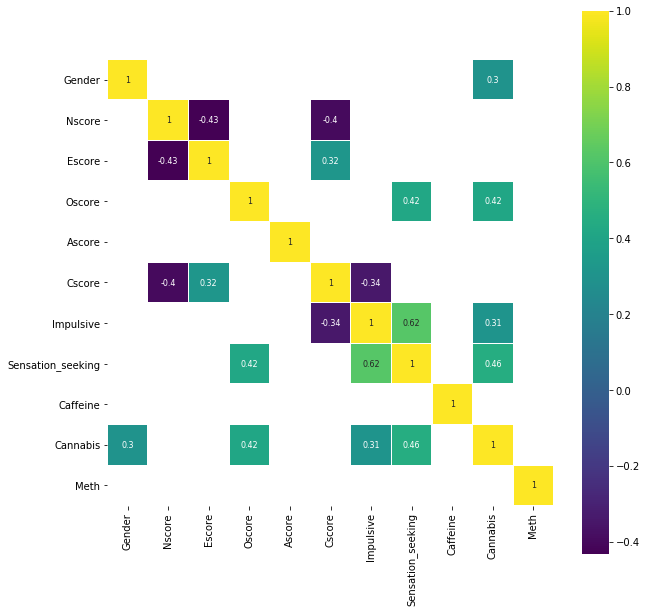

In [7]:
# In order to get an impression of the possible internal relations we will plot a correlation matrix

numerical_cols = df.select_dtypes(include = ['float64', 'int64'])
corr = numerical_cols.corr()

print("Integer column relationships in dataset")

fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr,cmap="viridis",vmax=1.0,linewidths=0.1,annot=True,annot_kws={"size": 8},square=True,ax=ax)
plt.show()

print("(Strongest) Integer column relationships in dataset")

fig, ax1 = plt.subplots(figsize=(10,10))  

sns.heatmap(corr[(corr>=0.3) | (corr <= -0.3)],cmap="viridis",vmax=1.0,linewidths=0.1,annot=True,annot_kws={"size": 8},square=True,ax=ax1)
plt.show()

In [8]:
# Since we deleted Semeron we should update the dataset before loading it into the actual R algorithms
df.to_csv(r'Datasets/Dataset_Coeff_Estimation.csv',index=False)